In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
product = pd.read_csv('Products.csv')
customer = pd.read_csv('Customers.csv')
transaction = pd.read_csv('Transactions.csv')

In [3]:
# group the data on CustomerID and agg
df = pd.merge(customer,transaction.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_quntity=('TransactionID', 'count')
).reset_index(),on='CustomerID', how='left').fillna(0)
     

In [4]:
df

,CustomerID,CustomerName,Region,SignupDate,total_spent,total_quntity
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3.0
...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,4982.88,4.0
196,C0197,Christina Harvey,Europe,2023-03-21,1928.65,3.0
197,C0198,Rebecca Ray,Europe,2022-02-27,931.83,2.0
198,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,4.0


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [6]:
columns_to_scale = ['total_spent', 'total_quntity']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [7]:
df

,CustomerID,CustomerName,Region,SignupDate,total_spent,total_quntity
0,C0001,Lawrence Carroll,South America,2022-07-10,0.314274,0.454545
1,C0002,Elizabeth Lutz,Asia,2022-02-13,0.174514,0.363636
2,C0003,Michael Rivera,South America,2024-03-07,0.255332,0.363636
3,C0004,Kathleen Rodriguez,South America,2022-10-09,0.501681,0.727273
4,C0005,Laura Weber,Asia,2022-08-15,0.190581,0.272727
...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,0.466830,0.363636
196,C0197,Christina Harvey,Europe,2023-03-21,0.180689,0.272727
197,C0198,Rebecca Ray,Europe,2022-02-27,0.087300,0.181818
198,C0199,Andrea Jenkins,Europe,2022-12-03,0.185432,0.363636


In [9]:
df = pd.get_dummies(df, columns=['Region'])

In [10]:
df

,CustomerID,CustomerName,SignupDate,total_spent,total_quntity,Region_Asia,Region_Europe,Region_North America,Region_South America
0,C0001,Lawrence Carroll,2022-07-10,0.314274,0.454545,0,0,0,1
1,C0002,Elizabeth Lutz,2022-02-13,0.174514,0.363636,1,0,0,0
2,C0003,Michael Rivera,2024-03-07,0.255332,0.363636,0,0,0,1
3,C0004,Kathleen Rodriguez,2022-10-09,0.501681,0.727273,0,0,0,1
4,C0005,Laura Weber,2022-08-15,0.190581,0.272727,1,0,0,0
...,...,...,...,...,...,...,...,...,...
195,C0196,Laura Watts,2022-06-07,0.466830,0.363636,0,1,0,0
196,C0197,Christina Harvey,2023-03-21,0.180689,0.272727,0,1,0,0
197,C0198,Rebecca Ray,2022-02-27,0.087300,0.181818,0,1,0,0
198,C0199,Andrea Jenkins,2022-12-03,0.185432,0.363636,0,1,0,0


In [11]:
X = df.drop(['CustomerID', 'CustomerName', 'SignupDate'], axis=1)

In [12]:
X

,total_spent,total_quntity,Region_Asia,Region_Europe,Region_North America,Region_South America
0,0.314274,0.454545,0,0,0,1
1,0.174514,0.363636,1,0,0,0
2,0.255332,0.363636,0,0,0,1
3,0.501681,0.727273,0,0,0,1
4,0.190581,0.272727,1,0,0,0
...,...,...,...,...,...,...
195,0.466830,0.363636,0,1,0,0
196,0.180689,0.272727,0,1,0,0
197,0.087300,0.181818,0,1,0,0
198,0.185432,0.363636,0,1,0,0


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

Optimal number of clusters (k): 4
DB Index for optimal k: 0.33502510437968713


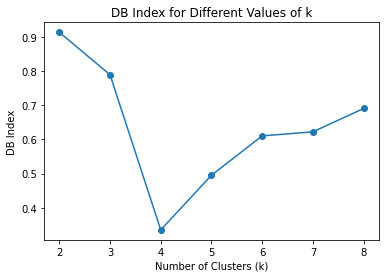

In [14]:
db_indexes = []
optimal_k = None

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    db_index = davies_bouldin_score(X, kmeans.labels_)
    db_indexes.append(db_index)

    if db_index == min(db_indexes):
        optimal_k = k

print("Optimal number of clusters (k):", optimal_k)
print("DB Index for optimal k:", min(db_indexes))

plt.plot(range(2, 9), db_indexes, marker='o')
plt.title('DB Index for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')
plt.xticks(range(2, 9))
plt.show()

In [15]:
from sklearn.decomposition import PCA

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

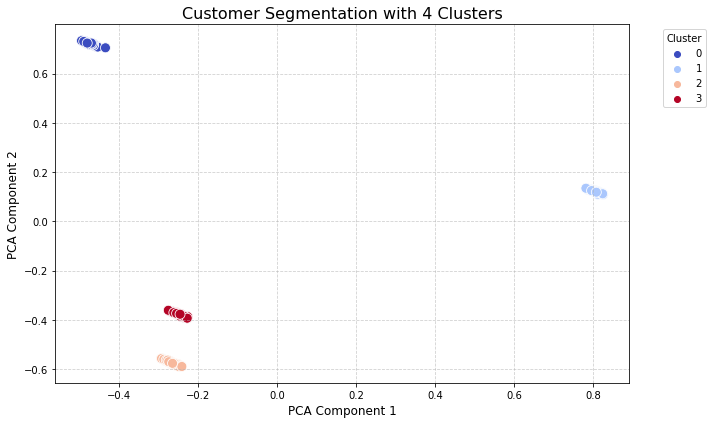

In [23]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette="coolwarm", s=100, edgecolor="white"
)
plt.title(f"Customer Segmentation with {optimal_k} Clusters", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [24]:
df

,CustomerID,CustomerName,SignupDate,total_spent,total_quntity,Region_Asia,Region_Europe,Region_North America,Region_South America,Cluster
0,C0001,Lawrence Carroll,2022-07-10,0.314274,0.454545,0,0,0,1,1
1,C0002,Elizabeth Lutz,2022-02-13,0.174514,0.363636,1,0,0,0,3
2,C0003,Michael Rivera,2024-03-07,0.255332,0.363636,0,0,0,1,1
3,C0004,Kathleen Rodriguez,2022-10-09,0.501681,0.727273,0,0,0,1,1
4,C0005,Laura Weber,2022-08-15,0.190581,0.272727,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
195,C0196,Laura Watts,2022-06-07,0.466830,0.363636,0,1,0,0,0
196,C0197,Christina Harvey,2023-03-21,0.180689,0.272727,0,1,0,0,0
197,C0198,Rebecca Ray,2022-02-27,0.087300,0.181818,0,1,0,0,0
198,C0199,Andrea Jenkins,2022-12-03,0.185432,0.363636,0,1,0,0,0


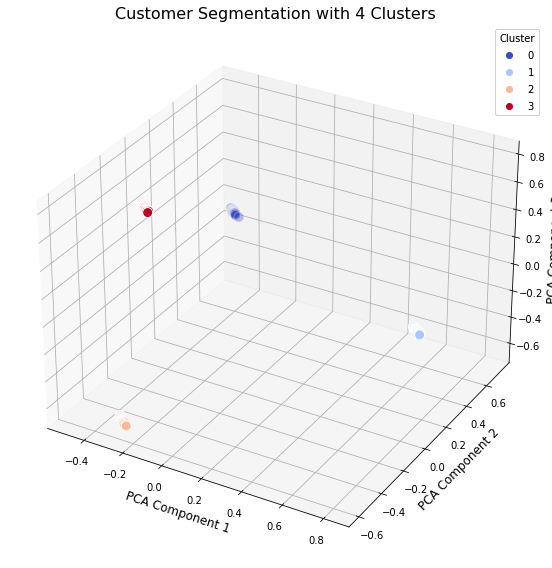

In [25]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Cluster'], cmap='coolwarm', s=100, edgecolor='white'
)

ax.set_title(f"Customer Segmentation with {optimal_k} Clusters", fontsize=16)
ax.set_xlabel("PCA Component 1", fontsize=12)
ax.set_ylabel("PCA Component 2", fontsize=12)
ax.set_zlabel("PCA Component 3", fontsize=12)

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
nu